In [97]:
%run kernels.ipynb

# Оценка параметров распределения для выборки времени происшествия события относительно предыдущего события и критерий хи2
## 1. Чтение данных и их начальная обработка

In [98]:
data = pd.read_csv('C:/Users/User/Desktop/Study/Scientific_work/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)
print("Input data shape: " , data.shape)
data = data.drop(data.iloc[:, 9:],  axis=1)
data = data.drop(data.columns[[0, 4, 5, 6]], axis = 1)

Input data shape:  (181691, 135)


## 2. Выборка данных для России

In [99]:
df_russia = data[ (data["country_txt"] == "Russia") | (data["country_txt"] == "Soviet Union")  ] 
print("Data for Russia shape: " , df_russia.shape)
data.head()
df_russia.head()

Data for Russia shape:  (2272, 5)


,iyear,imonth,iday,country,country_txt
5768,1978,1,8,359,Soviet Union
38018,1989,4,20,359,Soviet Union
38019,1989,4,20,359,Soviet Union
39006,1989,7,26,359,Soviet Union
39007,1989,7,26,359,Soviet Union


## 3. Обработка данных для России

In [100]:
df_size = df_russia.shape[0];
df_russia = compute_and_add_days(df_russia, "days from start")
print("Preprocess data for Russia, with days from start, shape: " , df_russia.shape)

Preprocess data for Russia, with days from start, shape:  (2267, 6)


## 4. Применение первого метода разбиения

In [101]:
step_0 = 10;
step_1 = 15
step_2 = 30
d_step = 10 
time_proc = (df_russia.iloc[:,5:].values).reshape(2267)
time_proc = np.diff(time_proc)
#print(time_proc)
#time_arr, requests = make_reduce(df_russia, third_method_reduce, [step_0, step_1, step_2,d_step] , "Russia")
time_arr, requests = make_reduce(df_russia, first_method_reduce, step_0 , "Russia")

Reduce data for Russia with days from start, shape:  240
time intervals = 
[4120   97   30   22   18   92   45   34   19   16   28   14   33   17
   64  110   25   21   12   39   25   24   25   12   23   61   31   54
   11   20   37   13   73   21   70   19   14  451   40   25   22   40
   47   19   60   20   13   67   13   55   28   35   35   24   34   39
   24   36   48   79   17   12   24   29   34   59   18   35   44   25
   46   45   12   35   20   64   43   40   31   35   44   45   18   12
   40   31   44   11   39   26   55   19   31   50   21   28   80   49
   15   36   20   40   14   35   35   26   35  160   27   57   38   29
   13   57   14   97   45   90   13   16   76   30   45   25   77   60
   21   30   15   49   75   12   17   38   14   75   13   12   68   20
   41   43   46   25   40   13   33   35   16   54   31  125   75   26
   23   46   46   19   23   34   56   15   38   80   60   12   46   29
   15   28   34   35   77   14   26   29   14  198   33   53  237   30
  

## 5. Проверка на независимость критерием Валлиса-Мура

In [102]:
alfa = 0.05
print("Wallis-Mur criterion")
Wallis_Murr_crit(time_proc, alfa, "Time initial for Russia")
Wallis_Murr_crit(time_arr, alfa, "Time diffs for Russia")
Wallis_Murr_crit(requests, alfa, "Requests for Russia")    

Wallis-Mur criterion
Time initial for Russia is dependet 5.7  >  1.96
Time diffs for Russia is undependet 1.08  <=  1.96
Requests for Russia is undependet 1.33  <=  1.96


## 6. Основное исследование

parameters p, a1, a2 =  [ 0.915  3.872 57.417]
Chi2 degree:  11
Chi2 statistic:          4.79
Chi2 treshould val right: 19.68


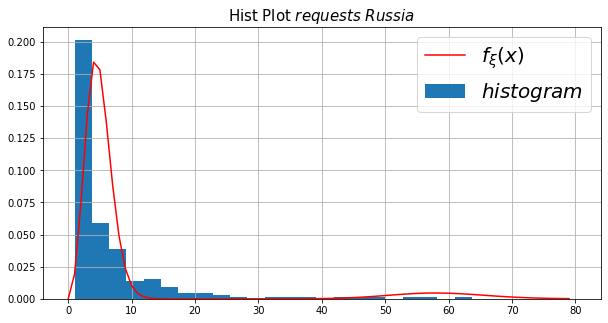

In [103]:
delimiter = 30
missed_vals = 2


sample1, sample2 = process_sample(requests, delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_Poisson(sample1)

param2 = GMM_Poisson(sample2)

P1 = Poisson_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests, a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3, P1, P2)

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests, 80, Mixed, ax1, "$requests$ $Russia$", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests, r, Mixed, alfa, 3)

parameters p, a1, a2 =  [ 0.915  3.872 57.417]
Chi2 degree:  11
Chi2 statistic:          4.79
Chi2 treshould val right: 19.68


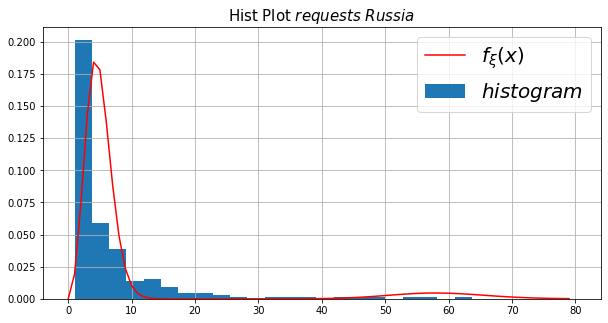

In [104]:
delimiter = 30
missed_vals = 2


sample1, sample2 = process_sample(requests, delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_Poisson(sample1)

param2 = GMM_Poisson(sample2)

P1 = Poisson_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests, a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3, P1, P2)

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests, 80, Mixed, ax1, "$requests$ $Russia$", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests, r, Mixed, alfa, 3)

240 192
parameters p, a1, a2 =  [ 0.897  0.196 53.727]
Chi2 degree:  11
Chi2 statistic:          0.25
Chi2 treshould val right: 19.68


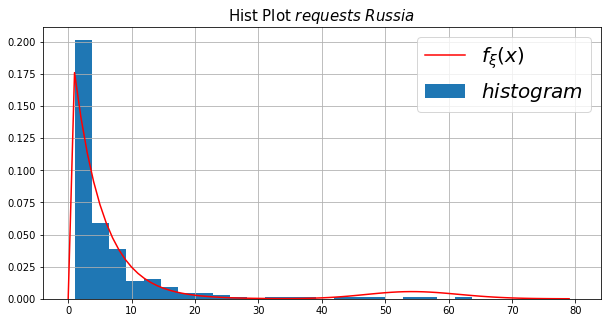

In [105]:
delimiter = 30
missed_vals = 2
sample_size = len(requests) // 10 * 8
print(len(requests), sample_size)
sample1, sample2 = process_sample(requests[:sample_size], delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_geom(sample1)

param2 = GMM_Poisson(sample2)

P1 = geom_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests[:sample_size], a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3, P1, P2)

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests, 80, Mixed, ax1, "$requests$ $Russia$", 30)
#plot_hist(requests[sample_size:], 80, Mixed, ax2, "$requests$ $Russia$ 20%", 30)
#plot_hist(requests[:sample_size], 80, Mixed, ax3, "$requests$ $Russia$ 80%", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests[sample_size:], r, Mixed, alfa, 3)


parameters h, sigma =  [11, 42.94154415758669]
Chi2 degree:  9
Chi2 statistic:          0.27
Chi2 treshould val right: 16.92


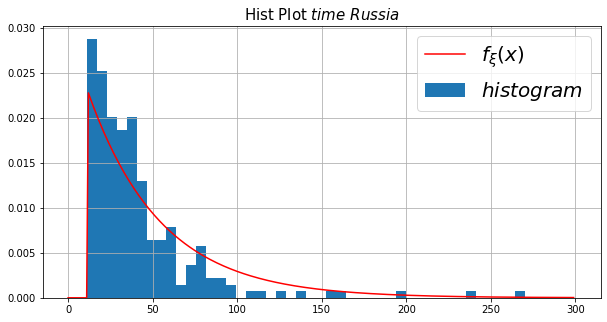

In [112]:
missed_vals = 2
param = GMM_shift_exp(time_arr, missed_vals)
P , F = shift_exp_param([min(time_arr), param[1]])
print("parameters h, sigma = ", [min(time_arr), param[1]])

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(time_arr, 300, P, ax1, "$time$ $Russia$", 50)

alfa = 0.05
r = 12
Chi_2_crit1(time_arr, r, F, alfa, 2)


## Для Америки

In [107]:
df_usa = data[(data["country_txt"] == "United States")] 
print("Data for USA shape: " , df_usa.shape)

Data for USA shape:  (2836, 5)


In [108]:
df_usa = compute_and_add_days(df_usa, "days from start")
print("Preprocess data for USA, with days from start, shape: " , df_usa.shape)
df_usa.head()

Preprocess data for USA, with days from start, shape:  (2803, 6)


,iyear,imonth,iday,country,country_txt,days from start
0,1970,1,1,217,United States,0
1,1970,1,1,217,United States,0
2,1970,1,2,217,United States,1
3,1970,1,2,217,United States,1
4,1970,1,3,217,United States,2


In [109]:
step_0 = 10;
step_1 = 15
step_2 = 30
d_step = 10 

time_proc1 = (df_usa.iloc[:,5:].values).reshape(2803)
time_proc1 = np.diff(time_proc1)
print(time_proc1)
time_arr1, requests1 = make_reduce(df_usa, third_method_reduce, [step_0, step_1, step_2,d_step], "USA")
#time_arr, requests = make_reduce(df_russia, third_method_reduce, [step_0, step_1, step_2,d_step] , "Russia")
#time_arr, requests = make_reduce(df_russia, first_method_reduce, step_0 , "Russia")

[ 0  1  0 ...  4 11  0]
Reduce data for USA with days from start, shape:  262
time intervals = 
[587  81  66 104  21  36  92  41  47  78  42  99  62  30  38 102  37  33
  68  95  36 225  53  83 119  68  20  77  48  38  49  30  83  74  69  30
  49  42  70  28  29  89  24  55  96  16  45  75  82  15  82  65  30  48
  46  60  85  48  78  35  62  21  90  72  33  69  18  40  38  81  25  56
  33  35  67  63  46  30  52 103  94  45  19  75  51  82  30  79  35  51
  28  66  63 122  88  21  69  54  94  14  49  70  51  65  50 125  45  50
  61  35  26 140  53  40 107  23  76  32  86  62 130  52  54  35  34  72
 140  77  69 117 461  60  51  48  30  83  22  22  61  60  67  75  38 165
  48  40 138  66  76  59 217  31  39  66  86  84  77  49  61  31  68  14
  85  57 129  49  44  50  35  38  38  63  68  31  24 116  57  40  31  31
  91  54  55  42  83 143  28  82  78  73 178  42  87  60 139  58  45 147
  45 188  52  46 118 135  50  53  41 103 122  84  34  63  62  50  54  72
  36  52  36  76  51  47  73

In [110]:
alfa = 0.05
print("Wallis-Mur criterion")
Wallis_Murr_crit(time_proc1, alfa, "Time initial for USA")
Wallis_Murr_crit(time_arr1, alfa, "Time diffs for USA")
Wallis_Murr_crit(requests1, alfa, "Requests for USA")

Wallis-Mur criterion
Time initial for USA is dependet 10.11  >  1.96
Time diffs for USA is undependet 1.67  <=  1.96
Requests for USA is undependet 0.64  <=  1.96


parameters p, a1, a2 =  [  0.983   0.138 135.286]
Chi2 degree:  11
Chi2 statistic:          0.09
Chi2 treshould val right: 19.68


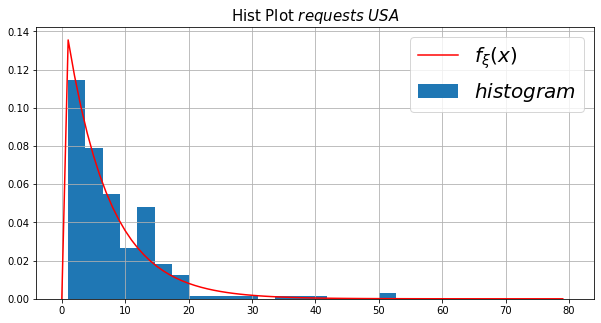

In [111]:
delimiter = 30
missed_vals = 0


sample1, sample2 = process_sample(requests1, delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_geom(sample1)

param2 = GMM_Poisson(sample2)

P1 = geom_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests, a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3[0], P1, P2)

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests1, 80, Mixed, ax1, "$requests$ $USA$", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests1, r, Mixed, alfa, 3)


In [ ]:
delimiter = 30
missed_vals = 0
sample_size1 = len(requests1)//10 * 8


sample1, sample2 = process_sample(requests1[:sample_size1], delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_geom(sample1)

param2 = GMM_Poisson(sample2)

P1 = geom_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests1[:sample_size1], a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3[0], P1, P2)

nrow = 2
fig, (ax1, ax2) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests1[sample_size1:], 80, Mixed, ax1, "$requests$ $USA$ 20%", 30)
plot_hist(requests1[:sample_size1], 80, Mixed, ax2, "$requests$ $USA$ 80%", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests1, r, Mixed, alfa, 3)

parameters h, sigma =  [14, 35.42853103443652]
Chi2 degree:  9
Chi2 statistic:          0.71
Chi2 treshould val right: 16.92


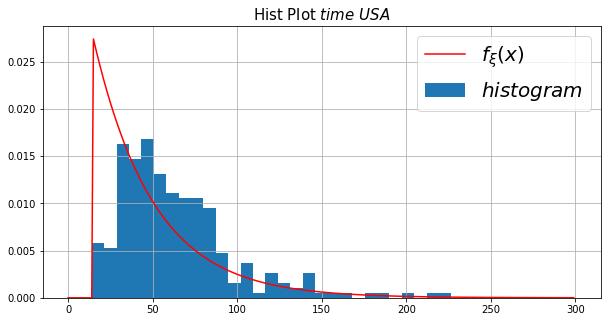

In [94]:
missed_vals = 2
param = GMM_shift_exp(time_arr1, missed_vals)
P , F = shift_exp_param([min(time_arr1), param[1]])
print("parameters h, sigma = ", [min(time_arr1), param[1]])

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(time_arr1, 300, P, ax1, "$time$ $USA$", 40)

alfa = 0.05
r = 12
Chi_2_crit1(time_arr1, r, F, alfa, 2)